**Zadanie 1.**

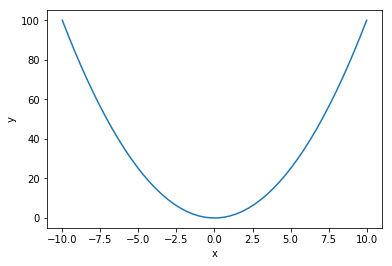

In [2]:
#Zadanie 1.
import operator, functools

def lagrange(x,y):
    product=lambda z,i : functools.reduce(operator.mul, [(z-x[j])/(x[i]-x[j]) for j in range(0, len(x)) if(i!=j)])
    result=lambda z: sum ([product(z,i)*y[i] for i in range(0,len(x))])
    return result

x = [-1,0,1]
y = [1,0,1]

z = lagrange(x,y)

import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10)
plt.plot(x, z(x))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


**Zadanie 2.**

<function matplotlib.pyplot.show(*args, **kw)>

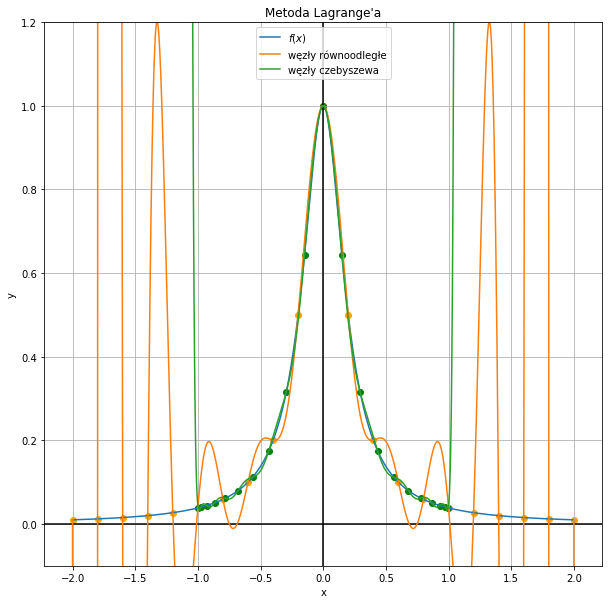

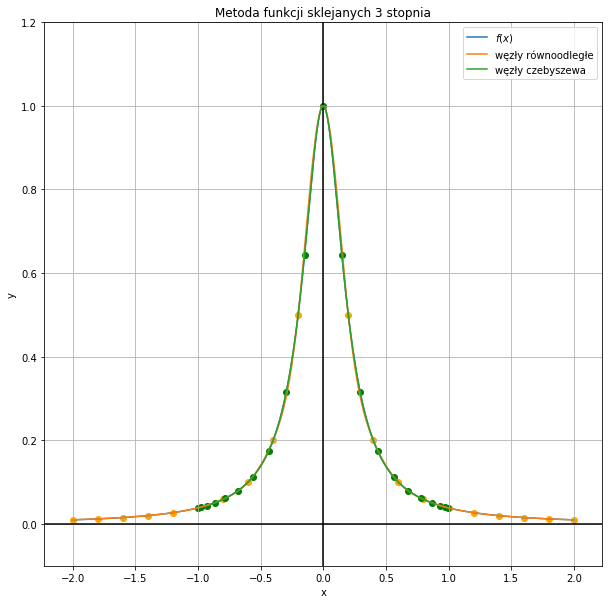

In [3]:
#Zadanie 2.
import math
from scipy import interpolate

f = lambda x: [(1/(25*i*i + 1)) for i in x]

def czebyszew(n):
    vec = []
    for i in range(1,n+1):
        vec.append(math.cos(((2*i-1)*math.pi)/(2*n)))
    return vec

x_points = np.linspace(-2,2,21)
x_czebyszew = czebyszew(21)

lagr = lagrange(x_points, f(x_points))
lagr_cz = lagrange(x_czebyszew, f(x_czebyszew))

x = np.linspace(-2,2, 1000)
plt.figure(figsize=(10,10))
plt.title("Metoda Lagrange'a")
plt.grid()
plt.ylim(-0.1,1.2)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x,f(x), label="$f(x)$")
plt.plot(x,lagr(x), label="węzły równoodległe")
plt.plot(x,lagr_cz(x), label="węzły czebyszewa")
plt.scatter(x_points, f(x_points), color="orange")
plt.scatter(x_czebyszew, f(x_czebyszew), color ="green")
plt.legend()
plt.show

interp = interpolate.interp1d(x_points, f(x_points), 'cubic')
interp_cz = interpolate.interp1d(x_czebyszew, f(x_czebyszew), 'cubic')

plt.figure(figsize=(10,10))
plt.title("Metoda funkcji sklejanych 3 stopnia")
plt.grid()
plt.ylim(-0.1,1.2)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.plot(x,f(x), label="$f(x)$")
plt.plot(x,interp(x), label="węzły równoodległe")
x = np.linspace(-0.9,0.9, 500)
plt.plot(x,interp_cz(x), label="węzły czebyszewa")
plt.scatter(x_points, f(x_points), color="orange")
plt.scatter(x_czebyszew, f(x_czebyszew), color ="green")
plt.legend()
plt.show

Metoda funkcji sklejanych 3 stopnia daje lepszy efekt niż metoda Lagrange'a, ale można ją stosować tylko wewnątrz przedziału węzłów.

Stosując metodę Lagrange'a możemy zaobserwować efekt Rungego.
Zastosowanie węzłów czebyszewa zmniejszy ten efekt ale tylko w przedziale od -1 do 1.

**Zadanie 3.**

<function matplotlib.pyplot.show(*args, **kw)>

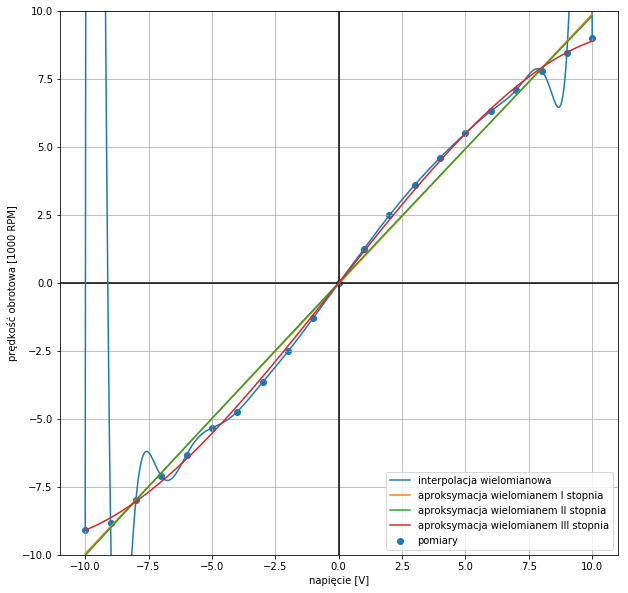

In [11]:
#Zadanie 3.
napiecia = np.arange(-10,11,1)
predkosc = [-9.10, -8.82, -7.99, -7.10, -6.32, -5.33, -4.73, -3.65, -2.52, -1.28, 0.00, 1.26, 2.49, 3.61, 4.61, 5.51, 6.32, 7.10, 7.81, 8.45, 9.02]

poly_interp_values = np.polyfit(napiecia, predkosc, 20)
func_interp = np.poly1d(poly_interp_values)

poly_values1 = np.polyfit(napiecia, predkosc, 1)
func1 = np.poly1d(poly_values1)
poly_values2 = np.polyfit(napiecia, predkosc, 2)
func2 = np.poly1d(poly_values2)
poly_values3 = np.polyfit(napiecia, predkosc, 3)
func3 = np.poly1d(poly_values3)

x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(10,10))
plt.grid()
plt.ylim(-10,10)
plt.xlabel('napięcie [V]')
plt.ylabel('prędkość obrotowa [1000 RPM]')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(napiecia, predkosc, label="pomiary")
plt.plot(x, func_interp(x), label="interpolacja wielomianowa")
plt.plot(x, func1(x), label="aproksymacja wielomianem I stopnia")
plt.plot(x, func2(x), label="aproksymacja wielomianem II stopnia")
plt.plot(x, func3(x), label="aproksymacja wielomianem III stopnia")
plt.legend()
plt.show

**Zadanie 4.**

Kierowca minął fotoradar w ok. 2.2916950833167666 sekundzie
z prędkością ok. 21.508890881705156 m/s


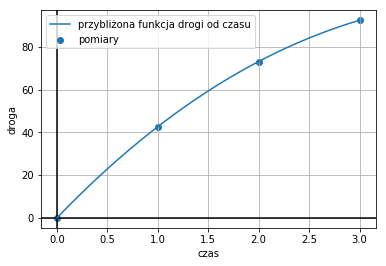

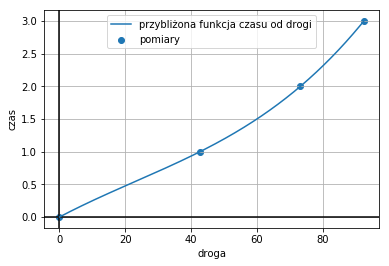

In [12]:
#Zadanie 4.
import scipy.optimize as sci

czas = np.arange(0.0,4.0,1.0)
polozenie = [0.0, 42.7, 73.2, 92.5]

droga_od_czasu = interpolate.interp1d(czas, polozenie, kind='cubic')
czas_od_drogi = interpolate.interp1d(polozenie, czas, kind='cubic')

pochodna = lambda f,x,epsilon: (f(x+epsilon)-f(x))/epsilon

x = np.linspace(0.0,3.0,1000)
plt.figure()
plt.grid()
plt.xlabel('czas')
plt.ylabel('droga')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(czas, polozenie, label="pomiary")
plt.plot(x, droga_od_czasu(x), label="przybliżona funkcja drogi od czasu")
plt.legend()
plt.show

x = np.linspace(0.0,92.5,1000)
plt.figure()
plt.grid()
plt.xlabel('droga')
plt.ylabel('czas')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.scatter(polozenie, czas, label="pomiary")
plt.plot(x, czas_od_drogi(x), label="przybliżona funkcja czasu od drogi")
plt.legend()
plt.show

t0 = czas_od_drogi(79.6)

print("Kierowca minął fotoradar w ok.", t0, "sekundzie")
print("z prędkością ok.", pochodna(droga_od_czasu,t0,0.0000001), "m/s")